Questions.. how do I predict macro trends for Crypto currencies 

### Get the dates and amount of fear greed  

In [360]:
import pandas as pd
savedf = pd.read_csv(r"./Fear Greed Index.csv")

# Dropping rows
savedf = savedf.drop(columns='Unnamed: 1')
savedf = savedf.drop(columns='Unnamed: 2')
savedf = savedf.drop(columns='Unnamed: 3')
savedf = savedf.drop(columns='Unnamed: 4')
savedf = savedf.drop(columns='Unnamed: 5')
savedf = savedf.drop(savedf.tail(5).index)

# Renaming columns 
savedf = savedf.rename(columns={'Unnamed: 0': 'c1'})

### Split the date and the amount into two seporate columns 

In [361]:
# totally not relavent to the rest of the analysis
# df['c2'] = df.iloc[::2,0]
# df['c3'] = df.iloc[1::2,0]

# df

### Drop NaNs

In [362]:
df = savedf

df = pd.DataFrame(df.c1.values.reshape(-1,2),columns=['c2','c3'])
df = df.rename(columns={'c2': 'date'})
df = df.rename(columns={'c3': 'sentiment'})

savedf = df

### strip the words from C2

In [363]:
df = savedf

df['sentiment'] = df['sentiment'].str[0:2]
df = df.replace(',','', regex=True)
df['sentiment'] = pd.to_numeric(df['sentiment'])

savedf = df

#### Add btc price 

In [364]:
btcPrice = pd.read_csv(r"./btcPrice.csv")
btcPrice = btcPrice.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])
btcPriceSave = btcPrice

#### Merge BTC prices with dataframe    

In [365]:
btcPrice = btcPriceSave

df = savedf

df.date = pd.to_datetime(df.date)
btcPrice.Date = pd.to_datetime(btcPrice.Date)
btcPrice = btcPrice.rename(columns={'Date': 'date'})
btcPrice = btcPrice.rename (columns={'Close': 'price'})
df = pd.merge(btcPrice, df, how='outer', on='date')
df = df.dropna()

savedf = df

#### Intersect both graphs over each other 

Text(0, 0.5, 'sentiment')

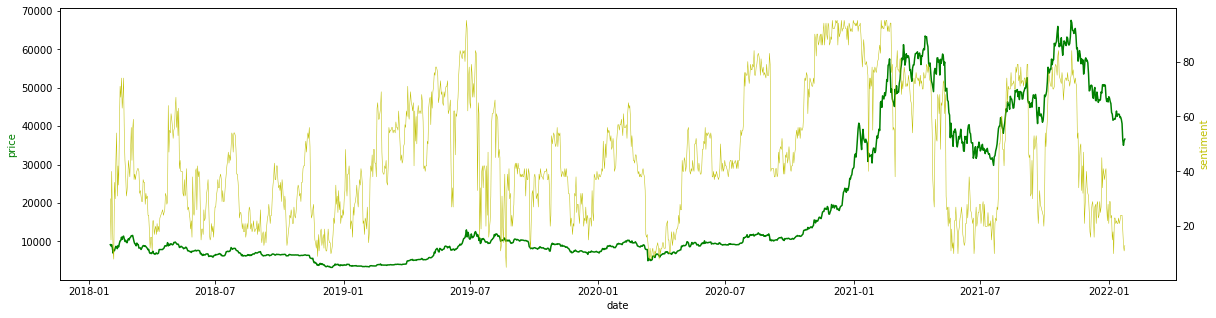

In [393]:
df = savedf

date = df['date'].tolist()
sentiment = df['sentiment'].tolist()
price = df['price'].tolist()

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,5)

x = np.arange(0, 10, 0.1)
y1 = 0.05 * x**2
y2 = -1 *y1

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(date, price, 'g-')
ax2.plot(date, sentiment, 'y-', linewidth=.5)

ax1.set_xlabel('date')
ax1.set_ylabel('price', color='g')
ax2.set_ylabel('sentiment', color='y')
